<a href="https://colab.research.google.com/github/adalves-ufabc/2024.Q2-PLN/blob/main/2024_Q2_PLN_AULA_11_Notebook_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2024-Q2]**
Prof. Alexandre Donizeti Alves

## **LangChain**
---



**LangChain** é um framework projetado para desenvolver aplicações que utilizam Grandes Modelos de Linguagem de maneira integrada e eficiente. Ele permite que desenvolvedores criem pipelines complexos, conectando diferentes componentes e serviços para criar soluções robustas e escaláveis baseadas em Inteligência Artificial.

https://python.langchain.com/v0.2/docs/introduction/

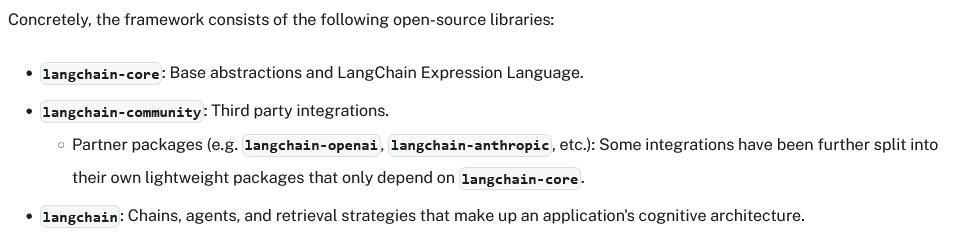

Para instalar o pacote **LangChain**, execute:

In [ ]:
#@title Instalando o pacote LangChain
!pip install langchain -q U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 734.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.6/377.6 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 9.7 MB/s eta 0:00:00


In [ ]:
#@title Versão do LangChain

import langchain

print(langchain.__version__)

0.2.11


Primeiro, vamos aprender como usar um modelo de linguagem por si só. **LangChain** suporta muitos modelos de linguagem diferentes que você pode usar de forma intercambiável.

In [ ]:
!pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.5 MB/s eta 0:00:00


In [ ]:
#@title Definindo a chave da API da OpenAI

import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


In [ ]:
#@title Teste

from langchain_openai import ChatOpenAI

modelo = ChatOpenAI(model = "gpt-3.5-turbo")

Vamos primeiro usar o modelo diretamente. Para simplesmente chamar o modelo, podemos passar uma lista de mensagens para o método `.invoke`.

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

mensagens = [
    SystemMessage(content = "Traduza o seguinte do inglês para o português"),
    HumanMessage(content = "hi!"),
]

resposta = modelo.invoke(mensagens)

Observe que a resposta do modelo é uma `AIMessage`. Porém, contém uma resposta de string junto com outros metadados sobre a resposta.

In [ ]:
resposta

AIMessage(content='Olá!', response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 27, 'total_tokens': 30}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-33893e55-3dd2-4b69-a7a5-47c4fd810059-0', usage_metadata={'input_tokens': 27, 'output_tokens': 3, 'total_tokens': 30})

In [ ]:
resposta.content

'Olá!'

Muitas vezes podemos querer apenas trabalhar com a resposta da string.

In [ ]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()

In [ ]:
resposta = modelo.invoke(mensagens)

In [ ]:
parser.invoke(resposta)

'Olá!'

Também é possível 'encadear' (*chain*) o modelo com esse *parser* de saída. Isso significa que esse *parser* de saída será chamado toda vez nessa cadeia.

Podemos criar facilmente a cadeia usando o operador `|`. O operador `|` é usado no **LangChain** para combinar dois elementos juntos.

In [ ]:
chain = modelo | parser

In [ ]:
chain.invoke(mensagens)

'Olá!'

**Templates de *Prompt***

No momento, estamos passando uma lista de mensagens diretamente para o modelo de linguagem. De onde vem essa lista de mensagens? Geralmente, ela é construída a partir de uma combinação de entrada do usuário e lógica de aplicação. Essa lógica de aplicação normalmente pega a entrada bruta do usuário e a transforma em uma lista de mensagens pronta para ser passada ao modelo de linguagem. Transformações comuns incluem adicionar uma mensagem do sistema ou formatar um modelo com a entrada do usuário.

`PromptTemplates` são um conceito no **LangChain** projetado para auxiliar nessa transformação. Eles recebem a entrada bruta do usuário e retornam dados (um *prompt*) que estão prontos para serem passados para um modelo de linguagem.

Vamos criar um `PromptTemplate`. Ele receberá duas variáveis do usuário:

- `language`: o idioma para o qual o texto será traduzido
- `text`: o texto a ser traduzido"

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

Primeiro, vamos criar uma string que será formatada para ser a mensagem do sistema:

In [ ]:
template_sistema = "Translate the following into {language}:"

Em seguida, podemos criar o `PromptTemplate`:

In [ ]:
template_prompt = ChatPromptTemplate.from_messages(
    [("system", template_sistema), ("user", "{text}")]
)

In [ ]:
resposta = template_prompt.invoke({"language": "portuguese", "text": "hi"})

resposta

ChatPromptValue(messages=[SystemMessage(content='Translate the following into portuguese:'), HumanMessage(content='hi')])

Podemos ver que ele retorna um `ChatPromptValue` que consiste em duas mensagens. Se quisermos acessar as mensagens diretamente, fazemos o seguinte:

In [ ]:
resposta.to_messages()

[SystemMessage(content='Translate the following into portuguese:'),
 HumanMessage(content='hi')]

In [ ]:
resposta.messages[0].content

'Translate the following into portuguese:'

In [ ]:
resposta.messages[1].content

'hi'

Agora podemos combinar isso com o modelo e o *parser* de saída mencionados acima usando o operador pipe (|):

In [ ]:
chain = template_prompt | modelo | parser

In [ ]:
chain.invoke({"language": "italian", "text": "hi"})

'Ciao'

Este é um exemplo simples de uso da *LangChain Expression Language* (LCEL) para encadear módulos **LangChain**.

O *LangChain Expression Language* (`LCEL`) é uma linguagem de expressão projetada para ser usada dentro do framework **LangChain**. Ela facilita a manipulação e transformação de dados dentro de fluxos de trabalho de modelos de linguagem. `LCEL` permite definir e aplicar transformações e operações de forma declarativa, facilitando a integração e personalização dos modelos de linguagem com dados e lógicas específicas.

**Referências**:

> https://python.langchain.com/v0.2/docs/tutorials/llm_chain/


